In [6]:
!pip install umap-learn

# **Load the dataset**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding

# Load the dataset
data = pd.read_csv('creditcard.csv')
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# **Data preprocessing**

In [8]:
X = data.drop(['Time', 'Class'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled[~np.isnan(X_scaled).any(axis=1)]


# **PCA**

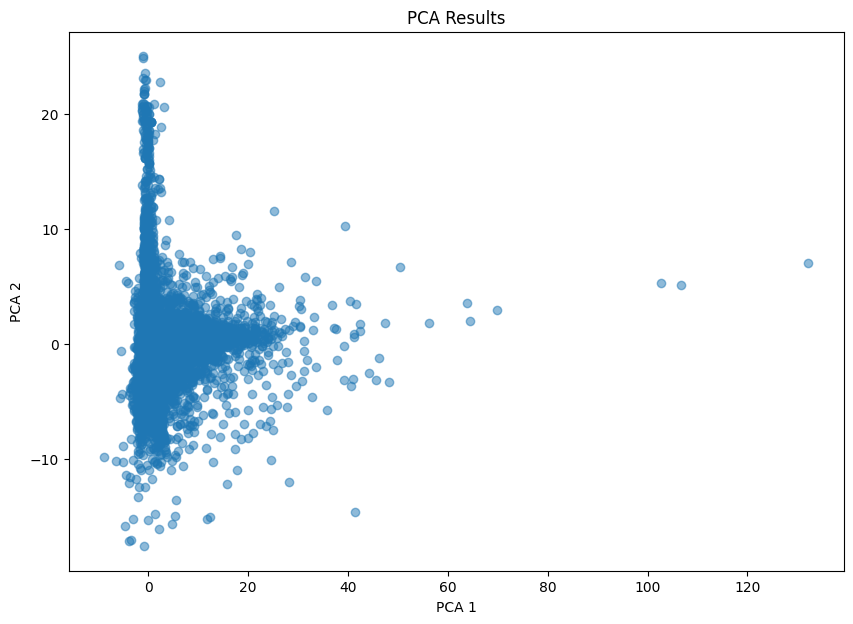

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


# **t-SNE**

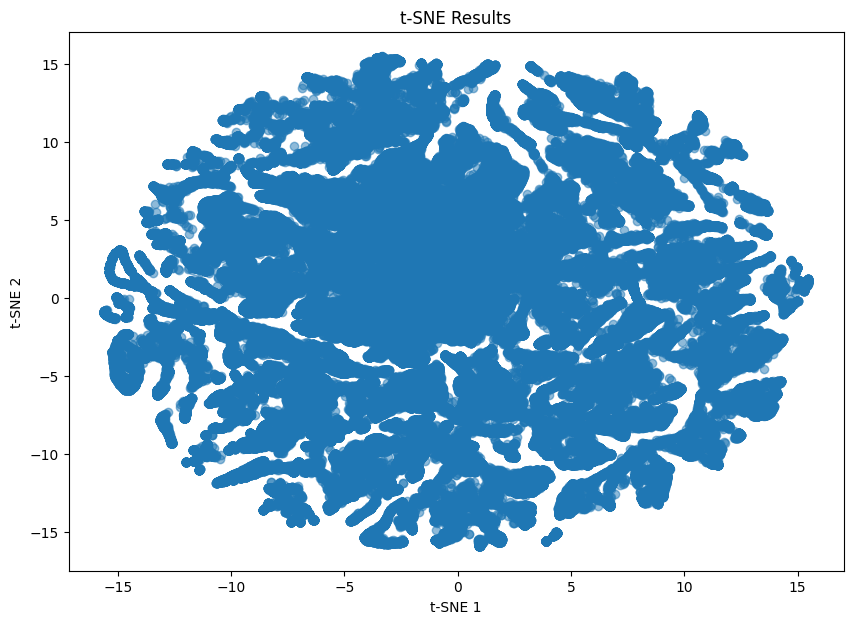

In [10]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE Results')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


# **UMAP**

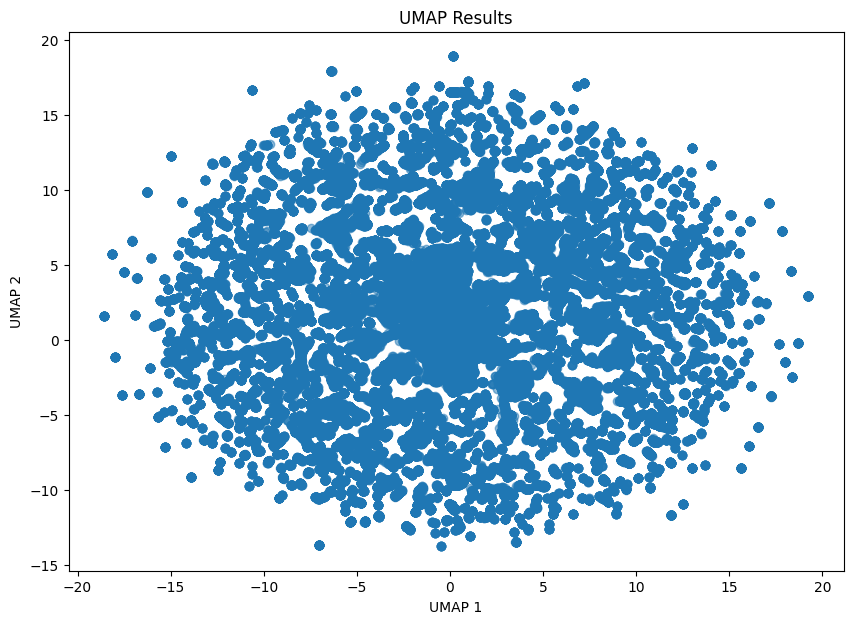

In [11]:
import umap
umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.5)
plt.title('UMAP Results')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


# **MDS**

In [1]:
import sklearn.manifold

mds = sklearn.manifold.MDS(n_components=2)
mds_result = mds.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(mds_result[:, 0], mds_result[:, 1], alpha=0.5)
plt.title('MDS Results')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.show()


NameError: ignored

# **ISOMap**

In [ ]:
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(isomap_result[:, 0], isomap_result[:, 1], alpha=0.5)
plt.title('ISOMap Results')
plt.xlabel('ISOMap 1')
plt.ylabel('ISOMap 2')
plt.show()


# **LLE**

In [ ]:
lle = LocallyLinearEmbedding(n_components=2)
lle_result = lle.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(lle_result[:, 0], lle_result[:, 1], alpha=0.5)
plt.title('LLE Results')
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.show()


# **SVD**

In [ ]:
from scipy.linalg import svd

U, S, Vt = svd(X_scaled)
svd_result = U[:, :2]

plt.figure(figsize=(10, 7))
plt.scatter(svd_result[:, 0], svd_result[:, 1], alpha=0.5)
plt.title('SVD Results')
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
plt.show()


# **UMAP Hyperparameter Tuning**

In [ ]:
# Varying the number of neighbors
for n_neighbors in [5, 15, 30]:
    umap_result = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1, n_components=2).fit_transform(X_scaled)

    plt.figure(figsize=(10, 7))
    plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.5)
    plt.title(f'UMAP Results with n_neighbors={n_neighbors}')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()


# **t-SNE Hyperparameter Tuning**

In [ ]:
# Varying the perplexity
for perplexity in [5, 30, 50]:
    tsne_result = TSNE(n_components=2, perplexity=perplexity, n_iter=300).fit_transform(X_scaled)

    plt.figure(figsize=(10, 7))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
    plt.title(f't-SNE Results with perplexity={perplexity}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()


# **UMAP Visualization**

In [ ]:
import umap.plot

umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2).fit_transform(X_scaled)
umap.plot.points(umap_result, theme='fire')
